# Phantom Generation for UMPIRE Test Cases

Showcase of Phantom Generation for UMPIRE test cases. 2D and semi 3D.

> **Have a look at the imported test-function documentation for detailed information**


In [1]:
# jupyter-notebook extensions
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

# custom import of built umpire package
from umpire import UMPIRE
# some plotting functions
from umpire.utils import plot_image_series, plot_4d

# custom manual import of test lib
import sys
sys.path.append("../tests")

from test_umpire import generate_simulated_data_2D, generate_simulated_data_semi3D, wrap_phase

# 2D Phantoms

In [2]:
TEs = [5, 10, 16, 21]
img_dims_2d = (64, 64)

### 01. Generate Phase Images

<IPython.core.display.Javascript object>


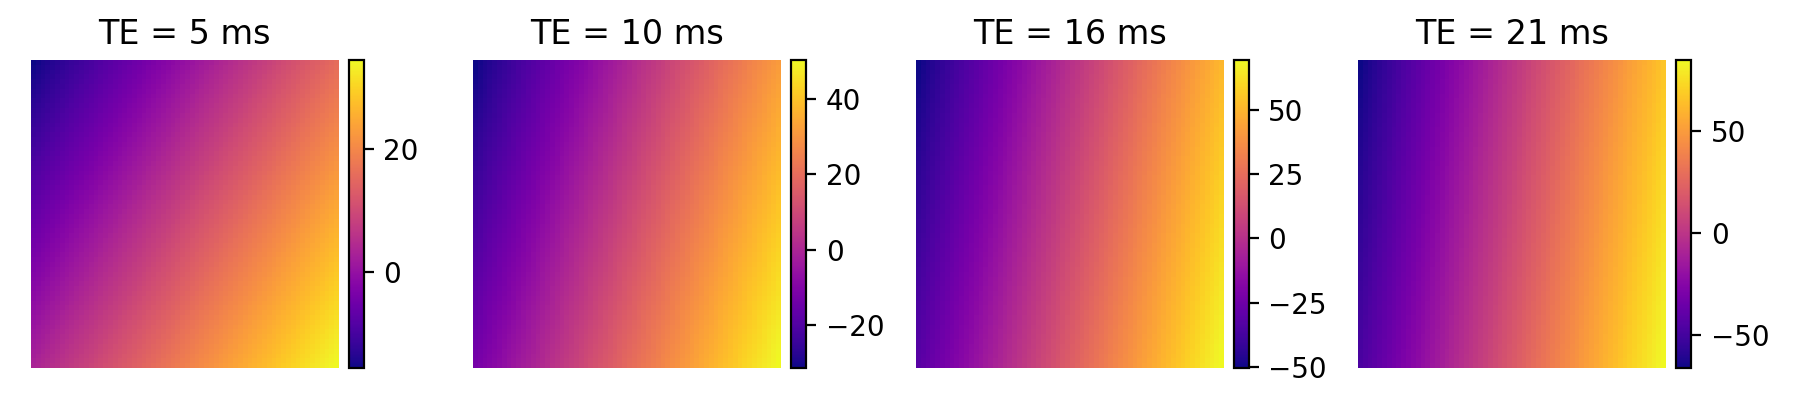

In [3]:
phase_images_2d = generate_simulated_data_2D(img_dims_2d, TEs, reciever_offset=True)

plot_image_series(phase_images_2d, [f"TE = {t} ms" for t in TEs], nrows=1, figsize=(9,2))

### 02. Wrap Phase Images

<IPython.core.display.Javascript object>


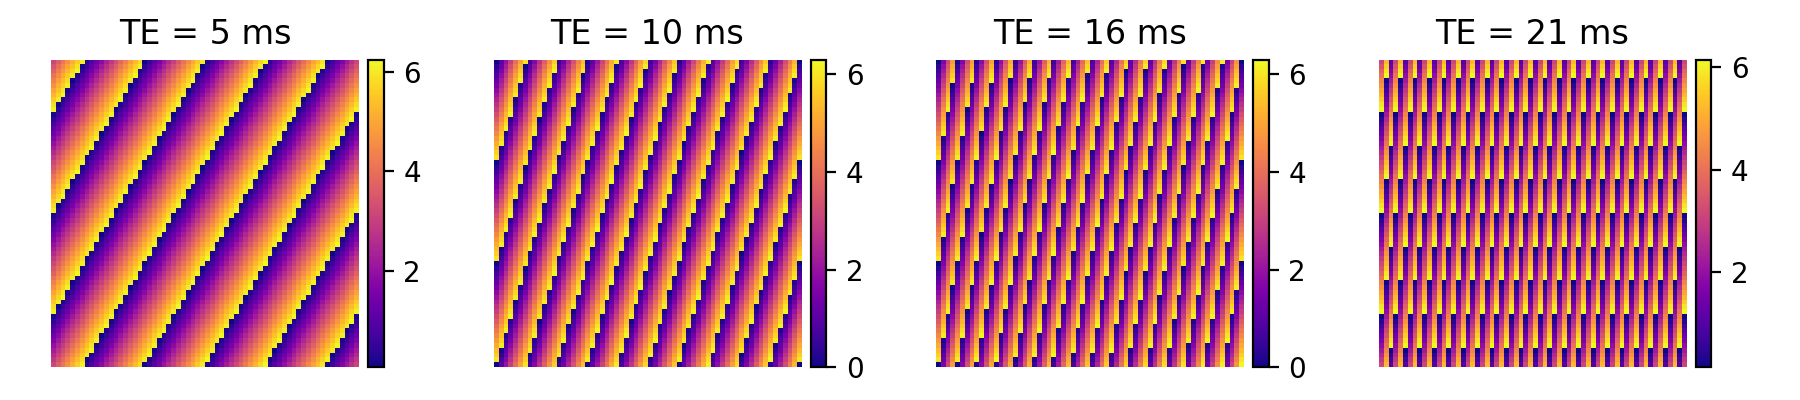

In [4]:
phase_imgs_2d_wrapped = wrap_phase(phase_images_2d)

plot_image_series(phase_imgs_2d_wrapped, [f"TE = {t} ms" for t in TEs], figsize=(9,2))

### 03. Apply UMPIRE and compare with ground truth

Along the edges at exactly $\phi = \pi$ and $\phi=-\pi$ floating point errors lead to false results.  
This is however a very artificial szenario and should be of no concern.

<IPython.core.display.Javascript object>


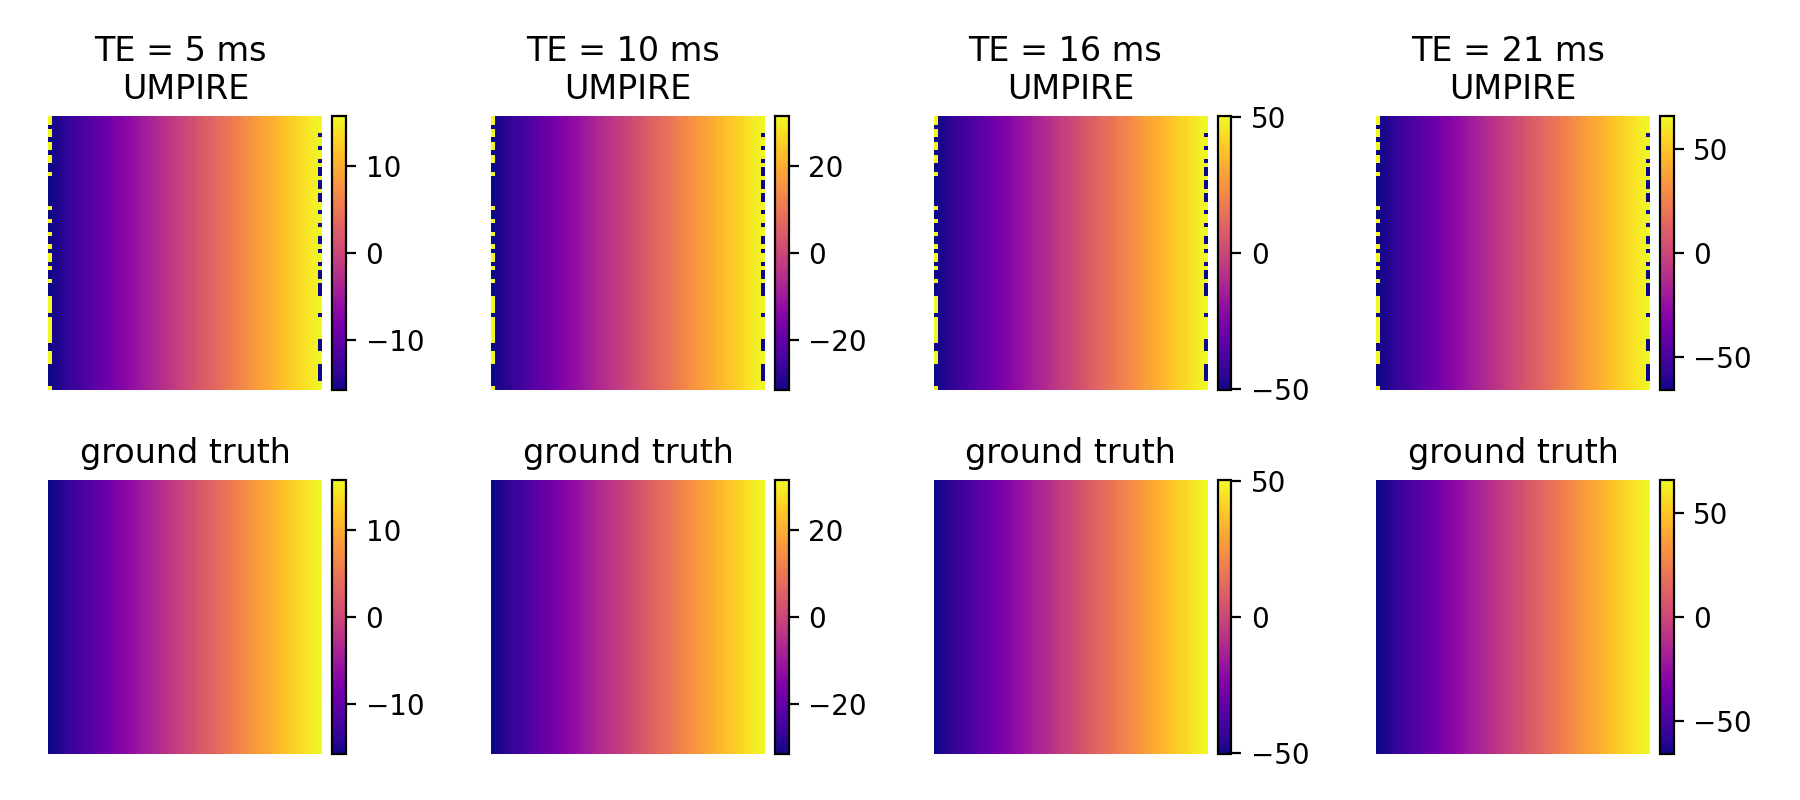

In [5]:
phase_imgs_2d_umpire = UMPIRE(
    phase_imgs_2d_wrapped,
    TEs,
    DPD_filter_func=False,
    magnitude_weighted_omega_star=False,
)

phase_images_2d_groundtruth = generate_simulated_data_2D(img_dims_2d, TEs, reciever_offset=False)

plot_image_series(np.concatenate((phase_imgs_2d_umpire, phase_images_2d_groundtruth)),
                  [f"TE = {t} ms \nUMPIRE" for t in TEs] + ["ground truth"] * 4,
                  nrows=2,
                  plot_func = lambda x,y: x.imshow(y, cmap='plasma'),
                  figsize=(9,4))

---
# semi3D Phantoms

In [6]:
TEs = [5, 10, 16]
img_dims_3d = (64, 64, 64)

### 01. Generate 3D Phase Images

We ony display the first echo time here.

<IPython.core.display.Javascript object>


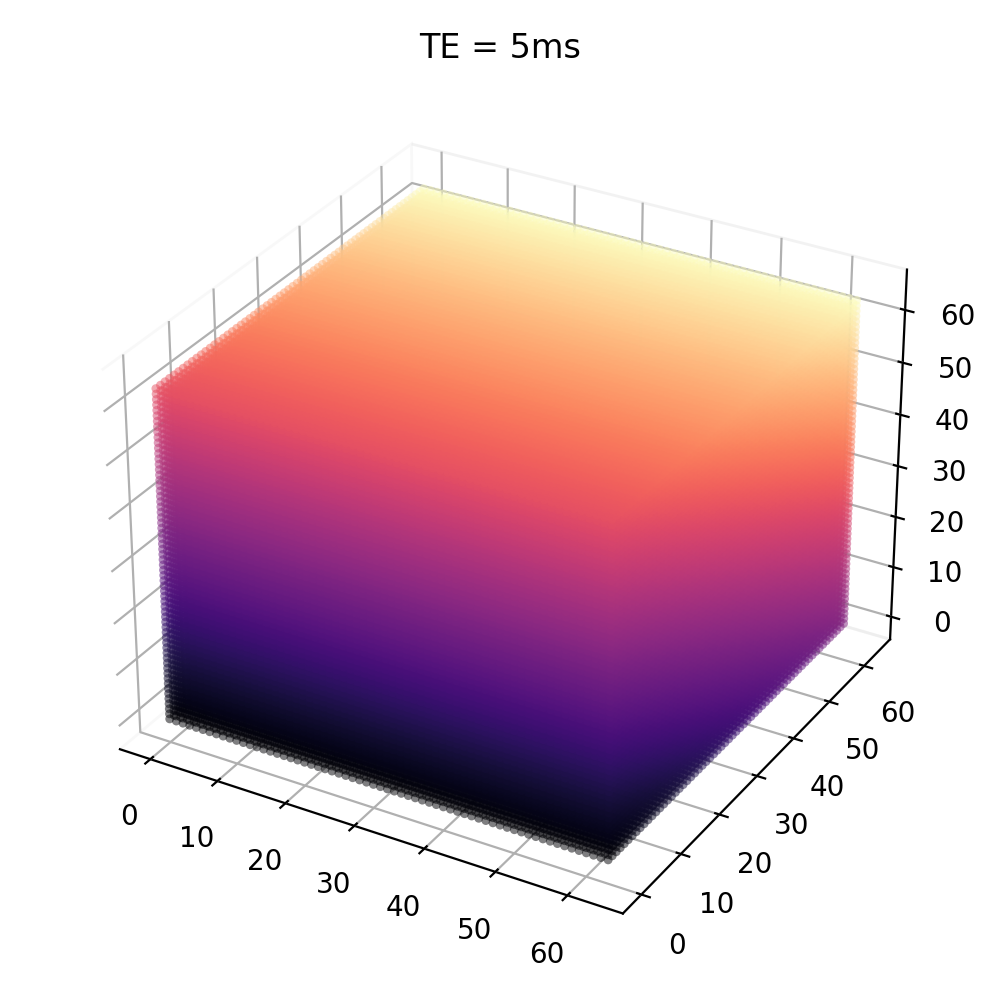

In [7]:
phase_images_3d = generate_simulated_data_semi3D(img_dims_3d, TEs)

ax = plot_4d(phase_images_3d[0], label="x")
ax.set_title("TE = 5ms")
plt.tight_layout()

### 02. Wrap the Phase

<IPython.core.display.Javascript object>


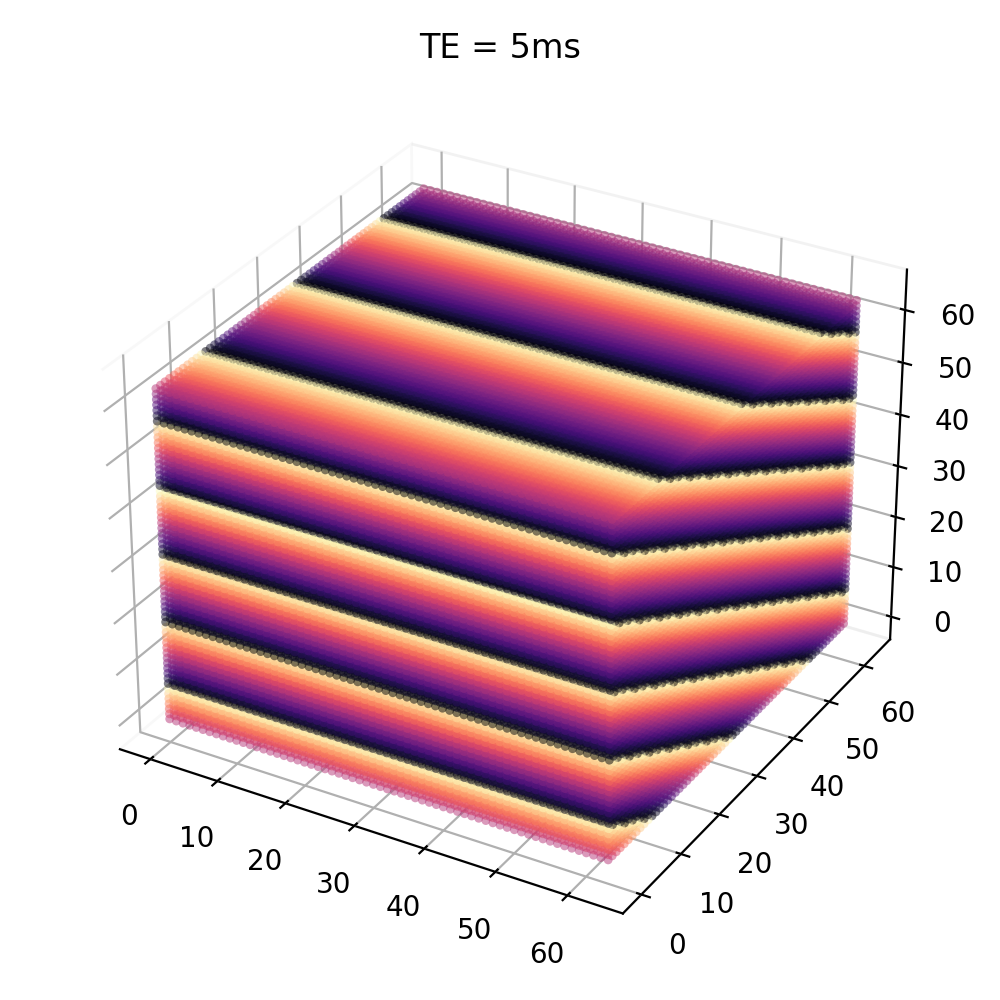

In [8]:
phase_images_3d_wrapped = wrap_phase(phase_images_3d)

ax = plot_4d(phase_images_3d_wrapped[0], label="x")
ax.set_title("TE = 5ms")
plt.tight_layout()

### 03. Apply UMPIRE

Again as with the 2D case, along the edges at exactly $\phi = \pi$ and $\phi=-\pi$ floating point errors lead to false results.  
This is however a very artificial szenario and should be of no concern.

<IPython.core.display.Javascript object>


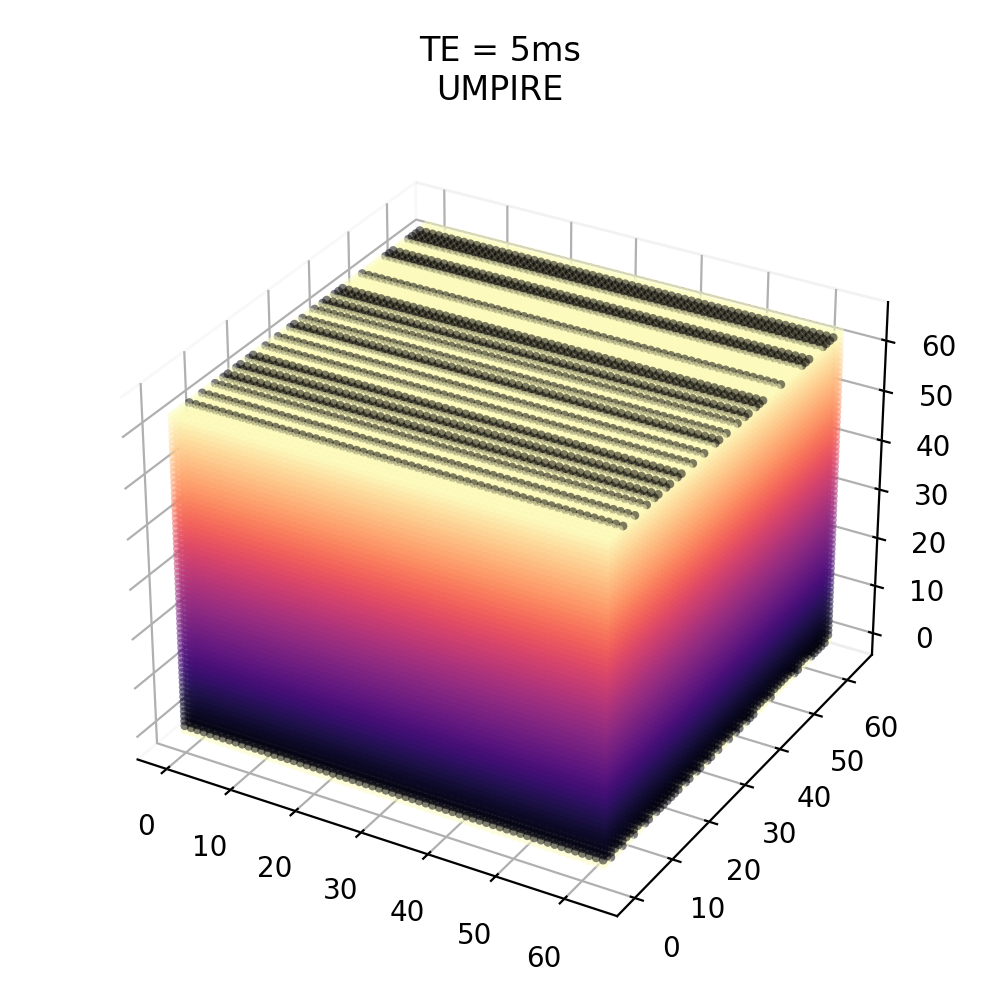

In [9]:
phase_images_3d_umpire = UMPIRE(
    phase_images_3d_wrapped,
    TEs,
    DPD_filter_func=False,
    magnitude_weighted_omega_star=False,
)

ax = plot_4d(phase_images_3d_umpire[0], label="x")
ax.set_title("TE = 5ms\nUMPIRE")
plt.tight_layout()